In [3]:
my_list=[1,3,5,2,4,9,5,8,0,7,6]

In [162]:
def the_oracle(my_input):
    winner=7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [163]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winnder found at index %i'%index)
        print('%i calls to the Oracle used'%(index+1))

NameError: name 'my_list' is not defined

----------------------------------------------------------

In [164]:
from qiskit import * # 这行代码从qiskit库导入所有的模块。qiskit是IBM提供的一个开源框架，用于编写和执行量子计算程序。使用*意味着导入qiskit库中所有可用的类和函数
import matplotlib.pyplot as plt # 这行代码导入了matplotlib.pyplot，并将其重命名为plt。matplotlib.pyplot是matplotlib库中的一个模块，用于绘制各种图形和图表
import numpy as np # 这行代码导入了numpy库，并将其重命名为np

In [165]:
#define the oracle circuit
oracle = QuantumCircuit(2,name='oracle') 
# 这行创建了一个名为oracle的新的量子电路。QuantumCircuit是Qiskit中用来定义量子电路的类。
# 括号内的参数2表示这个电路有两个量子比特。name='oracle'是对这个电子电路的命名，名字为oracle。


oracle.cz(0,1)
# 代码向oracle电路中添加了一个量子门：cz。cz门是一个受控-Z门，它对两个量子比特进行操作。
# 当第一个量子比特（标记为0）处于|1>状态时，它会将第二个量子比特（标记为1）的相位翻转。
# 如果第一个量子比特处于|0>状态，则不执行任何操作。这个操作是Grover算法中oracle的一部分，用于标记出搜索问题的解

oracle.to_gate()
# 这行代码将先前定义的量子电路oracle转换为一个量子门
# 在Qiskit中，量子电路可以通过.to_gate()方法转换成一个可以重用的门。
# 这对于当我们想要在更大的量子电路中重复使用这个oracle电路时是有用的
oracle.draw()

# oracle.draw(output="mpl")

# 最后这行代码调用了draw()方法来可视化oracle电路。
# 这会打印出电路的图示，显示其中包含的量子比特和量子门。
# 在默认情况下，这将在文本模式下显示电路，但也可以设置不同的输出格式，如matplotlib图表等

q_0: ─■─
      │ 
q_1: ─■─

In [166]:
backend = Aer.get_backend('statevector_simulator')
# 这行代码设置了statevector_simulator作为后端。Aer是Qiskit中用来执行量子电路的模拟器模块。
# 这里选择了statevector_simulator后端，它可以模拟量子电路的完整状态向量，这意味着它能提供量子系统在给定时刻的完整信息
# get_backend('statevector_simulator')调用是在请求Aer模块来提供这种类型的模拟器

grover_circ = QuantumCircuit(2,2)
# 这行代码创建了一个新的量子电路，名为grover_circ，它包含两个量子比特和两个经典比特。
# 在Grover算法中，量子比特用于进行量子计算，而经典比特用于测量结果的输出

grover_circ.h([0,1])
# 这行代码将Hadamard门应用于电路中的所有量子比特（这里是两个量子比特，编号为0和1）。
# Hadamard门（通常表示为H）是量子计算中常用的量子门之一，它可以创建量子比特的叠加状态。
# 在Grover算法中，这一步是初始化步骤的一部分，用于创建均匀的叠加状态，从而保证算法有均匀的概率搜索所有可能的输入。

grover_circ.append(oracle,[0,1])
# 这行代码将之前定义的oracle量子电路作为一个量子门添加到grover_circ中。
# append方法用于将一个量子门或电路添加到现有的量子电路中。[0,1]这个列表指定了oracle门作用的量子比特的编号。

grover_circ.draw()
# 这行代码调用draw()方法来可视化grover_circ电路。
# 这样可以看到包含在Grover算法量子电路中的所有量子门，以及它们的排列顺序。

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [167]:
job = execute(grover_circ,backend)
# 使用execute函数来运行名为grover_circ的量子电路。这个函数需要两个参数：一个是要运行的量子电路，另一个是执行电路的后端。
# 在这个例子中，后端是之前定义的statevector_simulator。
# 这个模拟器后端会计算电路的状态向量，这个状态向量描述了量子电路在最后一个量子门执行之后的完整量子状态
# 这个execute函数会立即返回一个job对象，该对象代表了已经提交给后端的运行请求。
# job对象可以用来查询执行的状态和结果

result = job.result()
# 这行代码调用job对象的result方法来获取执行的结果。
# 结果包含了量子电路执行完毕后的所有相关信息，比如量子态的状态向量、任何测量的结果以及可能的错误信息。

In [168]:
sv = result.get_statevector()
# 这行代码的作用是从模拟执行的结果中检索最终的状态向量。
# 状态向量是一个复数向量，代表执行量子电路grover_circ之后量子系统每个基态的振幅

np.around(sv, 2) 
# np.around(sv, 2) 使用NumPy库来将状态向量中的复数振幅四舍五入到两位小数。
# 这样做通常是为了简化输出，使结果更容易理解。
# 在状态向量中的每个元素对应于量子系统特定基态的振幅，其中元素的索引代表二进制的量子态。
# 例如，在两个量子比特的系统中，索引0对应于量子态|00⟩，索引1对应于|01⟩，索引2对应于|10⟩，索引3对应于|11⟩

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [169]:
# 这段代码定义了一个称为“reflection”（反射）的量子电路，它实现了Grover算法中的关键步骤之一，
# 通常被称为Grover漫反射（Grover diffusion operator）或者幅度放大器（amplitude amplification）。
# 漫反射操作旨在增强接近目标状态的振幅，并抑制其他状态的振幅，是Grover算法提高搜索效率的核心部分。
reflection = QuantumCircuit(2,name='reflection')
# 首先，创建一个含有2个量子比特的新量子电路，命名为'reflection'
reflection.h([0,1]) # 这一行将Hadamard门（H门）应用于两个量子比特。H门是量子计算中用来产生叠加状态的基本量子门，将|0>转变为(|0> + |1>)/sqrt(2)，将|1>转变为(|0> - |1>)/sqrt(2)。
reflection.z([0,1]) # 接着，Z门被应用于两个量子比特。Z门是一个相位反转门，它会将量子比特的|1>状态的相位反转180度，而|0>状态的相位保持不变。
reflection.cz(0,1) # 这一行在两个量子比特之间应用一个受控Z门（CZ）。这是一个两量子比特操作，只在控制量子比特（这里是量子比特0）为|1>时，才对目标量子比特（这里是量子比特1）应用Z门
reflection.h([0,1]) # 再次对两个量子比特应用Hadamard门，以完成反射操作
reflection.to_gate() # 这一行将整个reflection量子电路转换为一个量子门，使其可以作为整体模块被嵌入到更大的量子电路中

Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

In [170]:
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [171]:
backend = Aer.get_backend('qasm_simulator')
# 选择了Qiskit Aer模块中的'qasm_simulator'作为后端来执行量子电路。'qasm_simulator'是一个允许包含量子测量的电路模拟器，能够提供关于量子电路测量结果的经典信息

grover_circ = QuantumCircuit(2,2)
# 这行代码创建了一个新的量子电路grover_circ，它包含2个量子比特和2个经典比特。量子比特用来进行量子操作，经典比特用来存储量子测量的结果

grover_circ.h([0,1])
# 这行代码在两个量子比特上应用Hadamard门（H门）。
# H门能够将量子比特置于叠加态，这是Grover算法开始之前的准备步骤，可以确保搜索是在均匀的超位置态开始的

grover_circ.append(oracle,[0,1])
# 这行代码将之前定义的oracle（量子门或者子电路）附加到电路中。
# oracle负责标记出解空间中满足某个特定条件的状态。这个oracle是Grover算法的核心部分，它实现了对目标状态的相位翻转

grover_circ.append(reflection,[0,1])
# 这行代码在电路中附加了反射操作，通常称为Grover漫反射或扩散操作。
# 这个操作放大了oracle标记的状态的振幅，使它们在测量时更有可能被检测到。


grover_circ.measure([0,1],[0,1])
# 最后这行代码对两个量子比特进行测量，并将测量结果存储到对应的两个经典比特上。量子计算的结果需要通过这样的测量来转换成经典信息。

In [174]:
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [173]:
job=execute(grover_circ,backend,shots=1)
result=job.result()
result.get_counts()

{'11': 1}

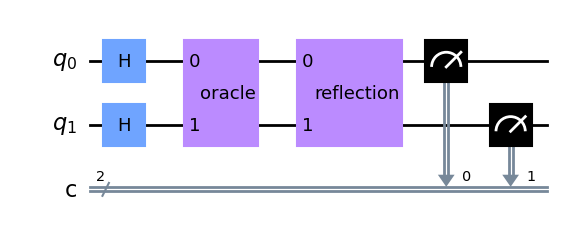

In [175]:
grover_circ.draw(output='mpl')

------------------------------------------

In [52]:
from qiskit import QuantumCircuit

# 构建一个包含2个量子比特的量子电路
qc = QuantumCircuit(2)

# 应用Hadamard门到所有量子比特上，以创建均匀的叠加态
qc.h([0, 1])


In [57]:
# 定义一个将目标状态翻转相位的Oracle
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # 如果量子比特都在1态，则翻转相位

oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [58]:
# 创建一个漫反射算子，用于放大目标态的概率幅度
reflection = QuantumCircuit(2)
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])

reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [55]:
# 将Oracle和漫反射算子应用到量子电路上
qc.append(oracle.to_gate(), [0, 1])
qc.append(reflection.to_gate(), [0, 1])


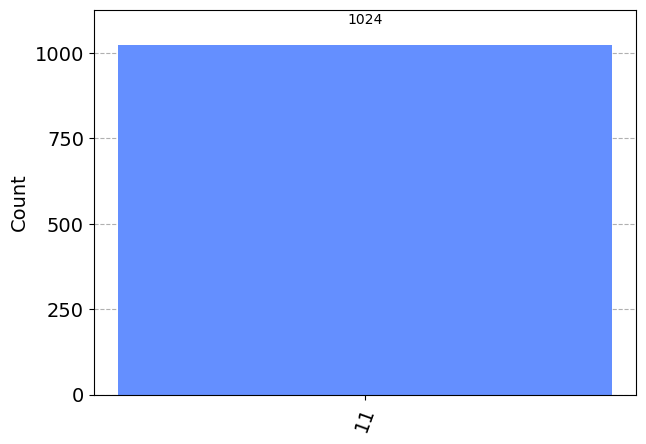

In [56]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# 添加测量门到所有量子比特上
qc.measure_all()

# 执行量子电路
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# 输出测量结果
counts = result.get_counts(qc)
plot_histogram(counts)



------ 4 qubits ------

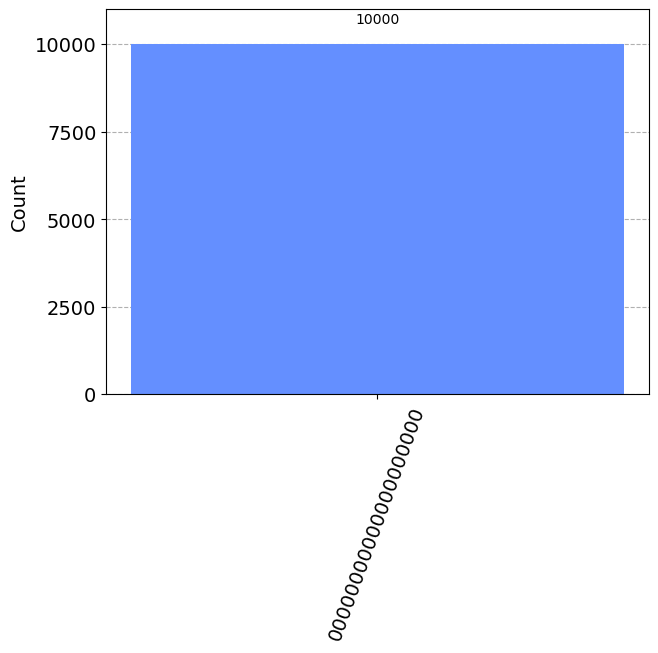

In [63]:
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
import numpy as np

# Define the number of qubits needed for the search space
n_qubits = 20  # Since 2^20 is just over one million

# Create a Quantum Circuit with n_qubits
qc = QuantumCircuit(n_qubits)

# Define the element to find: we're looking for the binary representation of 99999
element_to_find = format(99999, '0' + str(n_qubits) + 'b')

# Define the oracle
# This is a placeholder for the actual oracle implementation
# The actual oracle would require complex circuitry that flips the sign of the state |99999>
# and is beyond the scope of this example
def oracle(circuit, element):
    # Example oracle: Apply a Z gate to flip the phase of the |99999> state
    for i, bit in enumerate(element):
        if bit == '0':
            circuit.x(i)
    circuit.h(n_qubits-1)
    circuit.mct(list(range(n_qubits-1)), n_qubits-1)  # Multi-controlled Toffoli
    circuit.h(n_qubits-1)
    for i, bit in enumerate(element):
        if bit == '0':
            circuit.x(i)

oracle(qc, element_to_find)

# Add the diffusion operator (inversion about the mean)
def diffuser(circuit, nqubits):
    # Apply transformation |s> -> |00...0> (H-gates)
    for qubit in range(nqubits):
        circuit.h(qubit)
    # Apply transformation |00...0> -> |11...1> (X-gates)
    for qubit in range(nqubits):
        circuit.x(qubit)
    # Do multi-controlled-Z gate
    circuit.h(nqubits-1)
    circuit.mct(list(range(nqubits-1)), nqubits-1)  # Multi-controlled Toffoli
    circuit.h(nqubits-1)
    # Apply transformation |11...1> -> |00...0>
    for qubit in range(nqubits):
        circuit.x(qubit)
    # Apply transformation |00...0> -> |s>
    for qubit in range(nqubits):
        circuit.h(qubit)

diffuser(qc, n_qubits)

# Measurement
qc.measure_all()

# Execute the circuit on the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

# Since we're searching a large space, a single shot won't be sufficient. We'll need many shots to see the probability distribution.
result = execute(qc, simulator, shots=10000).result()
counts = result.get_counts(qc)

# Plot the results on a histogram
plot_histogram(counts)

# The state with the highest probability (ideally) should be our searched element, '99999' in binary form.


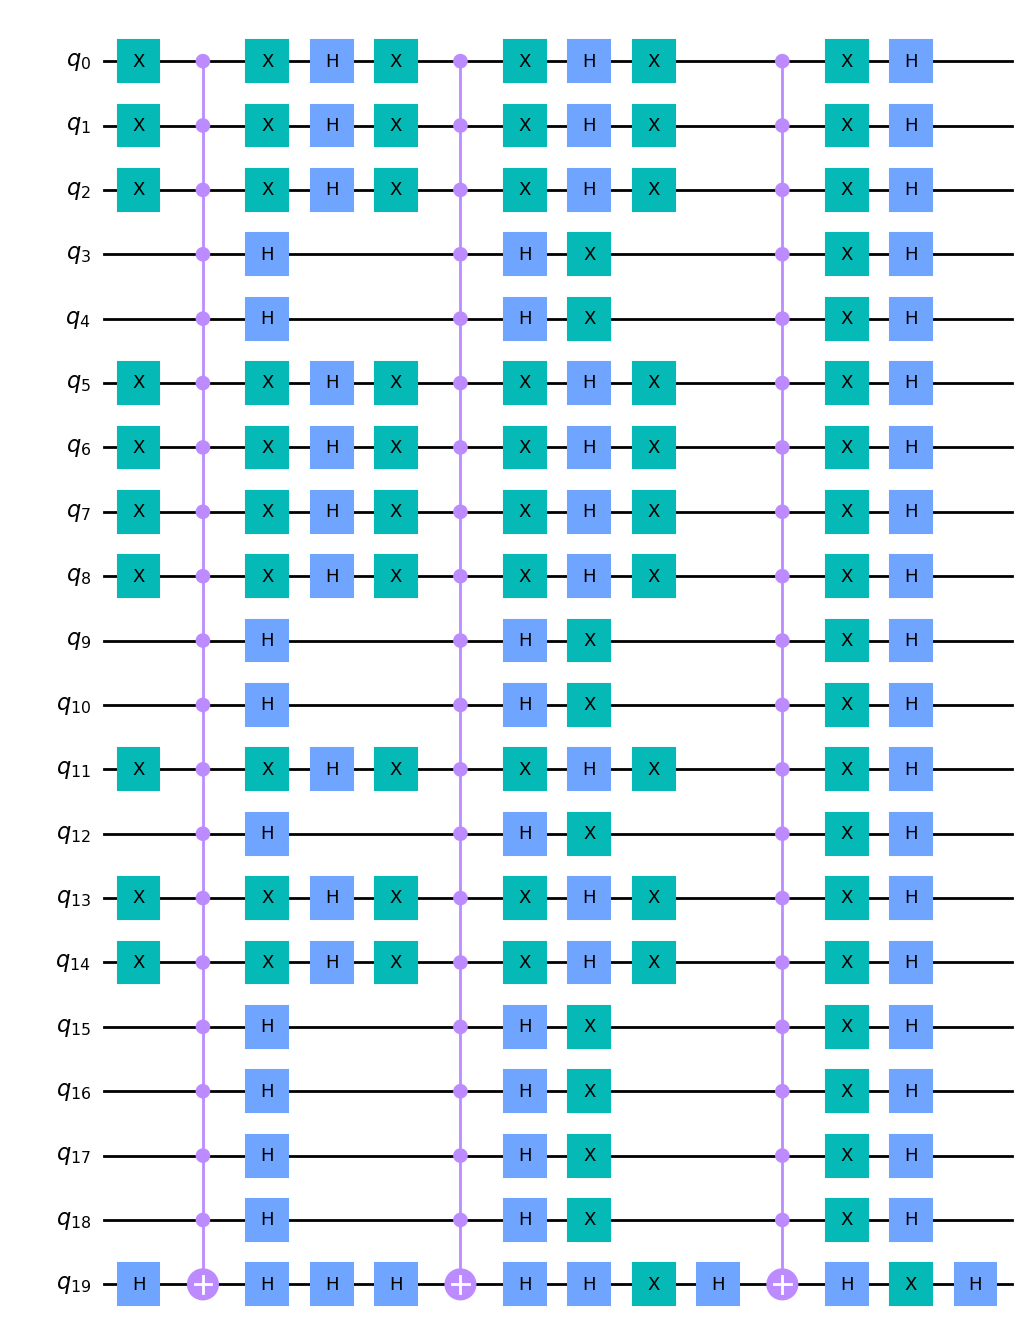

In [64]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import circuit_drawer

# 定义量子位数和搜索元素
n_qubits = 20  # 因为2^20略大于100万
element_to_find = format(99999, '0' + str(n_qubits) + 'b')

# 创建量子电路
qc = QuantumCircuit(n_qubits)

# 定义oracle
def oracle(circuit, element):
    for i, bit in enumerate(element):
        if bit == '0':
            circuit.x(i)
    circuit.h(n_qubits-1)
    circuit.mct(list(range(n_qubits-1)), n_qubits-1)  # 多控制Toffoli门
    circuit.h(n_qubits-1)
    for i, bit in enumerate(element):
        if bit == '0':
            circuit.x(i)

oracle(qc, element_to_find)

# 定义Grover扩散器（Diffuser）
def diffuser(circuit, nqubits):
    for qubit in range(nqubits):
        circuit.h(qubit)
        circuit.x(qubit)
    circuit.h(nqubits-1)
    circuit.mct(list(range(nqubits-1)), n_qubits-1)
    circuit.h(nqubits-1)
    for qubit in range(nqubits):
        circuit.x(qubit)
        circuit.h(qubit)

# 在查询oracle之前应用Hadamard门
qc.h(range(n_qubits))

# 插入oracle
oracle(qc, element_to_find)

# 应用扩散器
diffuser(qc, n_qubits)

# 绘制电路图
qc.draw(output='mpl')


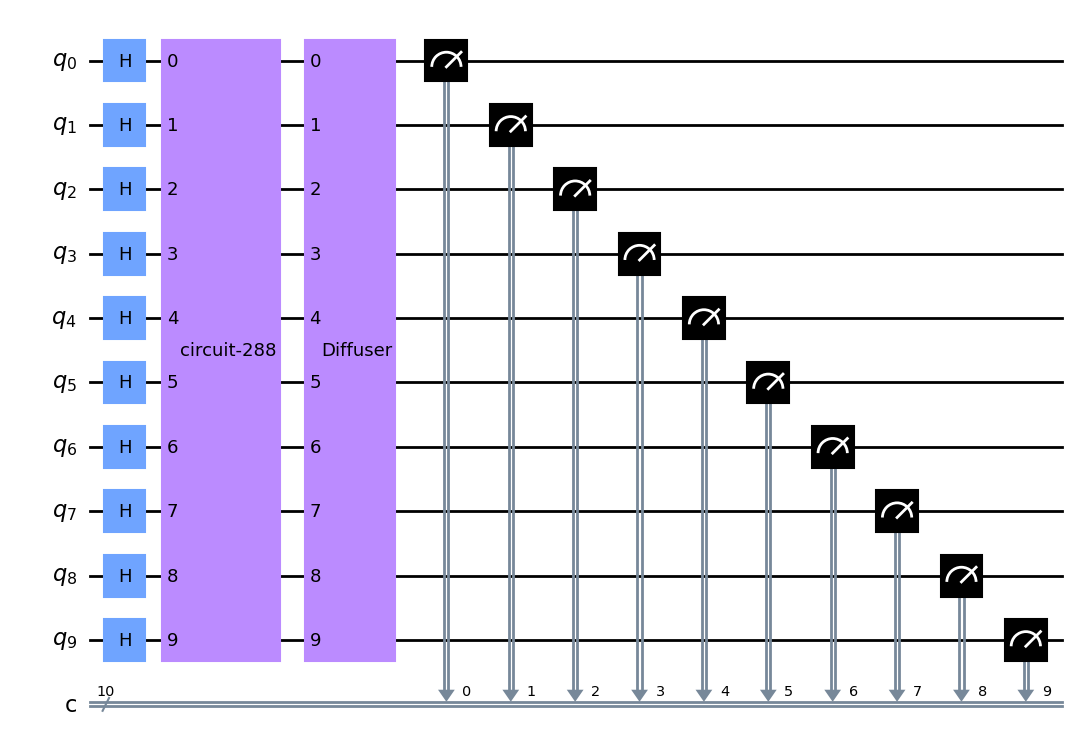

In [65]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

# Number of qubits needed
n_qubits = 10

# Function to create an oracle that flips the sign of the state |999>
def oracle_999(qc):
    # Apply X gates to qubits that correspond to a 0 in the binary representation of 999
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # Multi-controlled Z gate to flip the sign of the |999> state
    qc.h(n_qubits-1)
    qc.mct(list(range(n_qubits-1)), n_qubits-1)  # Apply the multi-controlled Toffoli (MCT) gate
    qc.h(n_qubits-1)
    # Apply X gates again to return the qubits to their original state
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # This oracle flips the sign of |999> = |1111100111>

# Function to create the diffuser circuit
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    qc.h(range(nqubits))
    # Apply transformation |00..0> -> |11..1> (X-gates)
    qc.x(range(nqubits))
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # Multi-controlled Toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    qc.x(range(nqubits))
    # Apply transformation |00..0> -> |s>
    qc.h(range(nqubits))
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

# Initialize quantum circuit for n qubits
qc = QuantumCircuit(n_qubits, n_qubits)

# Apply Hadamard gates to all qubits to create superposition
qc.h(range(n_qubits))

# Apply the oracle
oracle = QuantumCircuit(n_qubits)
oracle_999(oracle)
qc.append(oracle.to_gate(), range(n_qubits))

# Apply the diffuser
qc.append(diffuser(n_qubits), range(n_qubits))

# Measure the qubits
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
qc.draw('mpl')



In [66]:
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit using the simulator
result = execute(qc, backend, shots=1024).result()

# Get the counts (the number of times each result appears)
counts = result.get_counts(qc)

# Plot the results on a histogram
plot_histogram(counts)

plt.show()

In [83]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to create an oracle that flips the sign of the state |999>
def oracle_999(qc):
    # Apply X gates to qubits that correspond to a 0 in the binary representation of 999
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # Multi-controlled Z gate to flip the sign of the |999> state
    qc.h(n_qubits-1)
    qc.mct(list(range(n_qubits-1)), n_qubits-1)  # Apply the multi-controlled Toffoli (MCT) gate
    qc.h(n_qubits-1)
    # Apply X gates again to return the qubits to their original state
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # This oracle flips the sign of |999> = |1111100111>

# Function to create the diffuser circuit
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    qc.h(range(nqubits))
    # Apply transformation |00..0> -> |11..1> (X-gates)
    qc.x(range(nqubits))
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # Multi-controlled Toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    qc.x(range(nqubits))
    # Apply transformation |00..0> -> |s>
    qc.h(range(nqubits))
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

# Number of qubits
n_qubits = 10

# Initialize quantum circuit for n qubits
qc = QuantumCircuit(n_qubits, n_qubits)

# Apply Hadamard gates to all qubits to create superposition
qc.h(range(n_qubits))

# Apply the oracle
oracle = QuantumCircuit(n_qubits)
oracle_999(oracle)
qc.append(oracle.to_gate(), range(n_qubits))

# Apply the diffuser
qc.append(diffuser(n_qubits), range(n_qubits))

# Measure the qubits
qc.measure(range(n_qubits), range(n_qubits))

# Execute the circuit on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit using the simulator
result = execute(qc, backend, shots=1).result()

# Get the counts (the number of times each result appears)
counts = result.get_counts(qc)





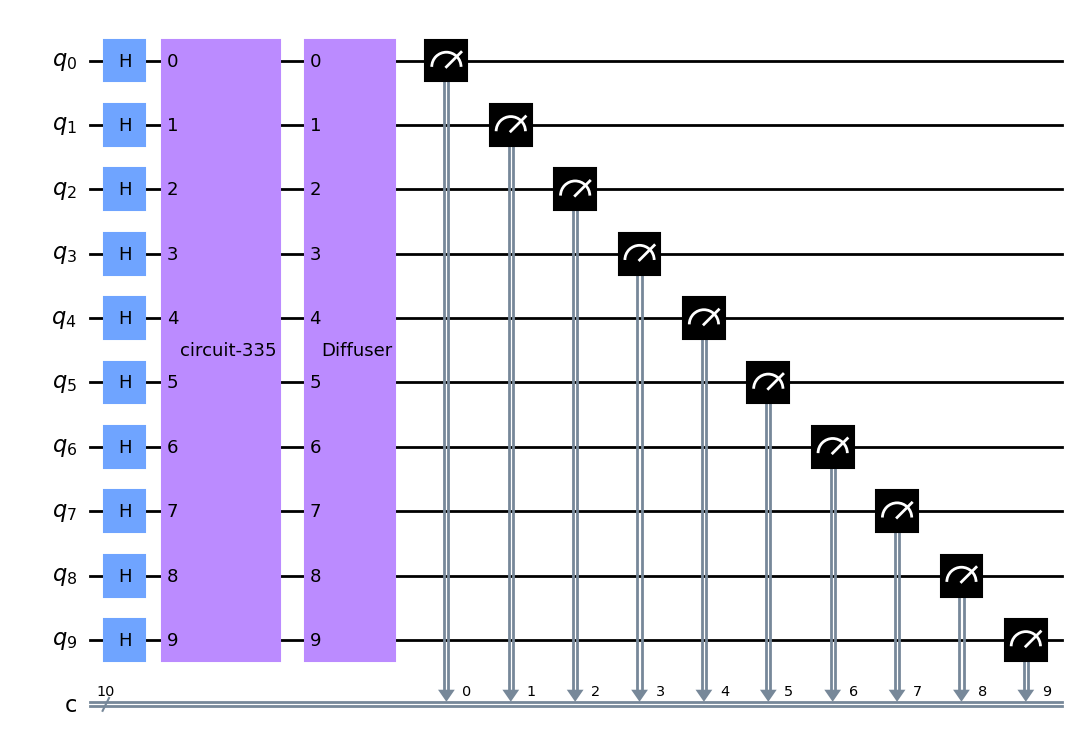

In [84]:
# # Draw the circuit
qc.draw('mpl')



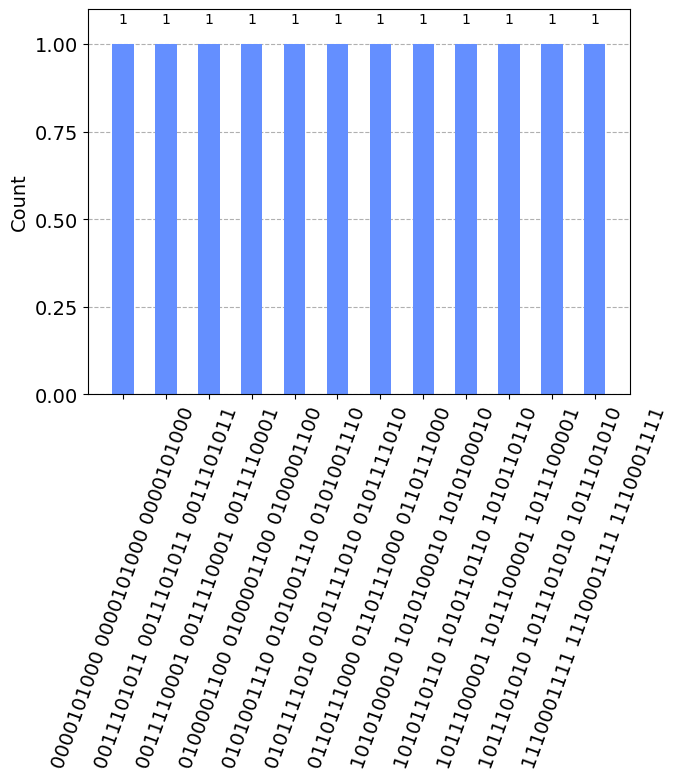

In [82]:
# Measurement
qc.measure_all()

# Execute the circuit on the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

# Since we're searching a large space, a single shot won't be sufficient. We'll need many shots to see the probability distribution.
result = execute(qc, simulator, shots=12).result()
counts = result.get_counts(qc)

# Plot the results on a histogram
plot_histogram(counts)

# The state with the highest probability (ideally) should be our searched element, '99999' in binary form.

In [94]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [95]:
# 定义oracle
# def oracle_999(qc):
#     # 999的二进制表示是 '1111100111'，因此我们需要翻转除了这些之外的比特
#     qc.x(0)  # 对应于二进制的第10位，即 '0'
#     qc.x(3)  # 对应于第7位，也是 '0'
#     qc.mcx([0, 1, 2, 3, 4, 5, 6, 7, 8], 9)  # 如果前9个量子比特为 '111110011'，则翻转第10个量子比特
#     qc.x(0)  # 将量子比特复原
#     qc.x(3)  # 将量子比特复原

    # Function to create an oracle that flips the sign of the state |999>
def oracle_999(qc):
    # Apply X gates to qubits that correspond to a 0 in the binary representation of 999
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # Multi-controlled Z gate to flip the sign of the |999> state
    qc.h(n_qubits-1)
    qc.mct(list(range(n_qubits-1)), n_qubits-1)  # Apply the multi-controlled Toffoli (MCT) gate
    qc.h(n_qubits-1)
    # Apply X gates again to return the qubits to their original state
    for qubit in [0, 1, 3]:
        qc.x(qubit)
    # This oracle flips the sign of |999> = |1111100111>

In [96]:
# 定义diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(range(nqubits))
    qc.x(range(nqubits))
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    qc.x(range(nqubits))
    qc.h(range(nqubits))
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

In [97]:
# 初始化量子电路
n = 10
qc = QuantumCircuit(n)

# 应用Hadamard门
qc.h(range(n))

# 添加oracle
qc.append(oracle_999, range(n))

# 添加diffuser
qc.append(diffuser(n), range(n))

# 测量电路
qc.measure_all()

# # # Draw the circuit
qc.draw('mpl')


TypeError: issubclass() arg 1 must be a class

In [98]:
# 执行电路
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

# 获取结果
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)
plt.show()

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x29d84e450>"'

In [99]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 定义oracle
def oracle_999(qc):
    # 999的二进制表示是 '1111100111'，因此我们需要翻转除了这些之外的比特
    qc.x(0)  # 对应于二进制的第10位，即 '0'
    qc.x(3)  # 对应于第7位，也是 '0'
    qc.mcx([0, 1, 2, 3, 4, 5, 6, 7, 8], 9)  # 如果前9个量子比特为 '111110011'，则翻转第10个量子比特
    qc.x(0)  # 将量子比特复原
    qc.x(3)  # 将量子比特复原

# 定义diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(range(nqubits))
    qc.x(range(nqubits))
    qc.h(nqubits-1)
    qc.mcx(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    qc.x(range(nqubits))
    qc.h(range(nqubits))
    U_s = qc.to_gate()
    U_s.name = "Diffuser"
    return U_s

# 初始化量子电路
n = 10
qc = QuantumCircuit(n)

# 应用Hadamard门
qc.h(range(n))

# 添加oracle
qc.append(oracle_999, range(n))

# 添加diffuser
qc.append(diffuser(n), range(n))

# 测量电路
qc.measure_all()

# 执行电路
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

# 获取结果
counts = result.get_counts(qc)

# 绘制直方图
plot_histogram(counts)
plt.show()


TypeError: issubclass() arg 1 must be a class

In [134]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT
import matplotlib.pyplot as plt
import time

# 999 in binary is '1111100111'
binary_representation = '1111100111'

# Create an oracle for 999
def oracle_999():
    oracle_qc = QuantumCircuit(n)
    # Apply X gates to qubits that correspond to a 0 in the binary representation of 999
    for qubit in range(len(binary_representation)):
        if binary_representation[qubit] == '0':
            oracle_qc.x(qubit)
    # Apply controlled Z gate
    oracle_qc.h(n-1)  # Convert the last CNOT to CZ
    oracle_qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli
    oracle_qc.h(n-1)  # Convert the last CNOT to CZ
    # Apply X gates again to return qubits that were 0 in the binary representation to their original state
    for qubit in range(len(binary_representation)):
        if binary_representation[qubit] == '0':
            oracle_qc.x(qubit)
    # Convert the circuit to a gate
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

# Create a diffuser
def diffuser(nqubits):
    diffuser_qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    diffuser_qc.h(range(nqubits))
    # Apply transformation |00..0> -> |11..1> (X-gates)
    diffuser_qc.x(range(nqubits))
    # Do multi-controlled-Z gate
    diffuser_qc.h(nqubits-1)
    diffuser_qc.mct(list(range(nqubits-1)), nqubits-1)
    diffuser_qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    diffuser_qc.x(range(nqubits))
    # Apply transformation |00..0> -> |s>
    diffuser_qc.h(range(nqubits))
    # Convert the circuit to a gate
    diffuser_gate = diffuser_qc.to_gate()
    diffuser_gate.name = "Diffuser"
    return diffuser_gate


# 开始计时
start_time = time.time()
# Number of qubits and quantum circuit initialization
n = 20
qc = QuantumCircuit(n, n)

# Apply Hadamard gates to all qubits to create superposition
qc.h(range(n))

# Append the oracle
qc.append(oracle_999(), range(n))

# Append the diffuser
qc.append(diffuser(n), range(n))

# Measurement
qc.measure(range(n), range(n))

# Execute the circuit on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1).result()

# 结束计时
end_time = time.time()

# 计算并打印运行时间
elapsed_time = end_time - start_time
print(f"Grover's algorithm ran in {elapsed_time:.2f} seconds")


# Get the counts (the number of times each result appears)
counts = result.get_counts(qc)

# Plot the results on a histogram
plot_histogram(counts)
plt.show()



Grover's algorithm ran in 0.10 seconds


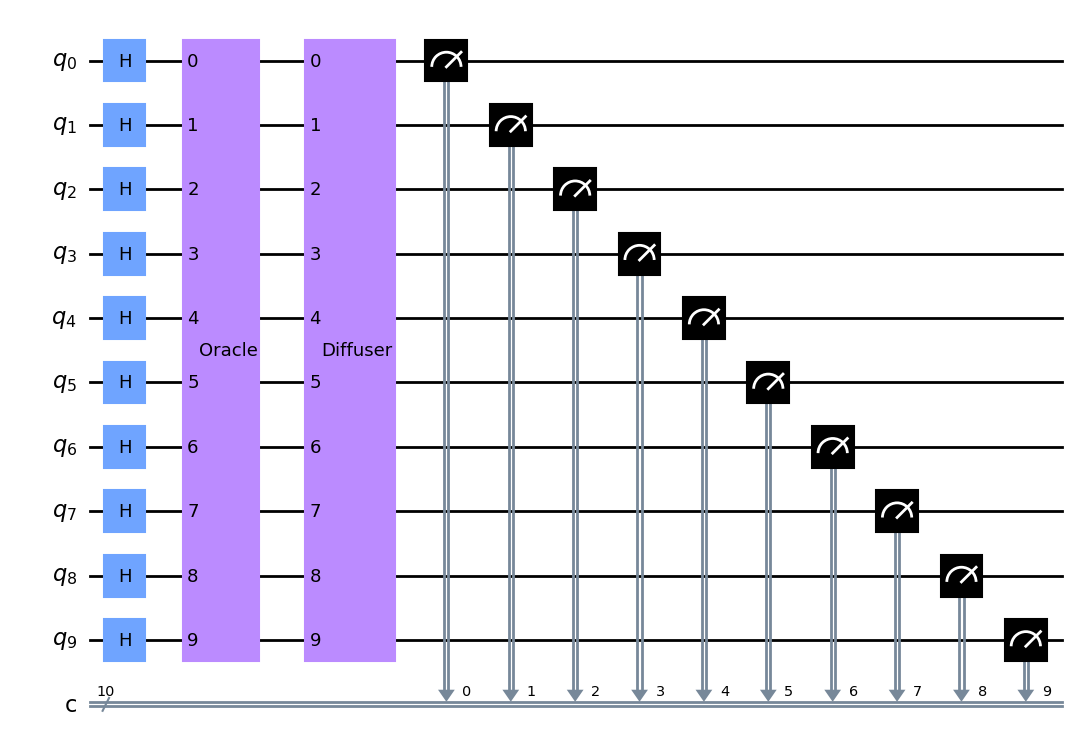

In [120]:
# # # Draw the circuit
qc.draw('mpl')

In [121]:
# 获取并打印测量结果
counts = result.get_counts(qc)
print("Measurement results:")
print(counts)

Measurement results:
{'1111010011': 1}


In [122]:
# 获取并打印特定结果（数字999）的测量次数
binary_999 = format(999, '010b')  # 将999转换为二进制的字符串表示形式
measurement_result = counts.get(binary_999, 0)  # 如果结果不存在，则返回0

print(f"Measurement result for 999 (binary {binary_999}): {measurement_result} times")

# 绘制结果直方图
plot_histogram(counts)
plt.show()

Measurement result for 999 (binary 1111100111): 0 times


In [137]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import time
import numpy as np

# 999 in binary is '1111100111'
binary_representation = '1111100111'

# Create an oracle for 999
def oracle_999():
    oracle_qc = QuantumCircuit(n)
    # Apply X gates to qubits that correspond to a 0 in the binary representation of 999
    for qubit in range(len(binary_representation)):
        if binary_representation[qubit] == '0':
            oracle_qc.x(qubit)
    # Apply controlled Z gate
    oracle_qc.h(n-1)  # Convert the last CNOT to CZ
    oracle_qc.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli
    oracle_qc.h(n-1)  # Convert the last CNOT to CZ
    # Apply X gates again to return qubits that were 0 in the binary representation to their original state
    for qubit in range(len(binary_representation)):
        if binary_representation[qubit] == '0':
            oracle_qc.x(qubit)
    # Convert the circuit to a gate
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

# Create a diffuser
def diffuser(nqubits):
    diffuser_qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    diffuser_qc.h(range(nqubits))
    # Apply transformation |00..0> -> |11..1> (X-gates)
    diffuser_qc.x(range(nqubits))
    # Do multi-controlled-Z gate
    diffuser_qc.h(nqubits-1)
    diffuser_qc.mct(list(range(nqubits-1)), nqubits-1)
    diffuser_qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    diffuser_qc.x(range(nqubits))
    # Apply transformation |00..0> -> |s>
    diffuser_qc.h(range(nqubits))
    # Convert the circuit to a gate
    diffuser_gate = diffuser_qc.to_gate()
    diffuser_gate.name = "Diffuser"
    return diffuser_gate


# oracle_999 和 diffuser 函数保持不变

# 计算迭代次数
N = 1000  # 搜索空间大小
iterations = round(np.pi/4 * np.sqrt(N))

# 开始计时
start_time = time.time()

# 初始化量子电路
n = 10  # 使用10个量子比特来表示搜索空间
qc = QuantumCircuit(n, n)

# 创建叠加态
qc.h(range(n))

# 进行多次Grover迭代
for _ in range(iterations):
    # 添加oracle
    qc.append(oracle_999(), range(n))
    # 添加diffuser
    qc.append(diffuser(n), range(n))

# 测量所有量子比特
qc.measure(range(n), range(n))

# 执行电路
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()

# 结束计时
end_time = time.time()

# 计算并打印运行时间
elapsed_time = end_time - start_time
print(f"Grover's algorithm ran in {elapsed_time:.2f} seconds")

# 获取测量结果
counts = result.get_counts(qc)

# 打印特定结果（数字999）的测量次数
binary_999 = format(999, '010b')  # 将999转换为二进制的字符串表示形式
measurement_result = counts.get(binary_999, 0)  # 如果结果不存在，则返回0
print(f"Measurement result for 999 (binary {binary_999}): {measurement_result} times")

# 打印所有测量结果
print("All measurement results:")
print(counts)

# 绘制结果直方图
plot_histogram(counts)
plt.show()

Grover's algorithm ran in 0.13 seconds
Measurement result for 999 (binary 1111100111): 0 times
All measurement results:
{'0110000001': 1, '1110011111': 1023}


In [136]:
# # Draw the circuit
# qc.draw('mpl')

----------Classical----------

Total search operations for 1024 linear searches: 1024000


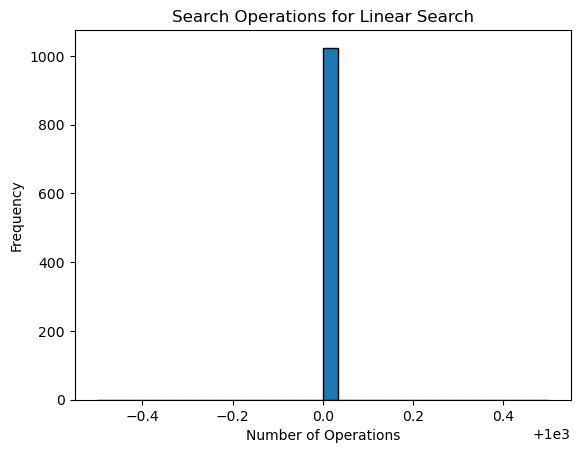

Time Complexity: O(N)


In [141]:
import matplotlib.pyplot as plt

# 创建一个未排序的数组，包含0到999的整数
array = list(range(1000))

# 线性搜索函数
def linear_search(arr, target):
    for i, item in enumerate(arr):
        if item == target:
            return i  # 返回找到目标值时的索引位置
    return -1  # 如果没有找到，返回-1

# 搜索数字999，重复执行1024次
target = 999
num_trials = 1024
search_counts = []

# 执行搜索并记录每次搜索中的操作次数
for _ in range(num_trials):
    index = linear_search(array, target)
    # 因为我们知道每次都会找到目标，所以操作次数是index+1
    search_counts.append(index + 1)

# 打印总操作次数
print(f"Total search operations for {num_trials} linear searches: {sum(search_counts)}")

# 绘制每次搜索操作次数的直方图
plt.hist(search_counts, bins=30, edgecolor='black')
plt.title('Search Operations for Linear Search')
plt.xlabel('Number of Operations')
plt.ylabel('Frequency')
plt.show()

# 时间复杂度
print("Time Complexity: O(N)")



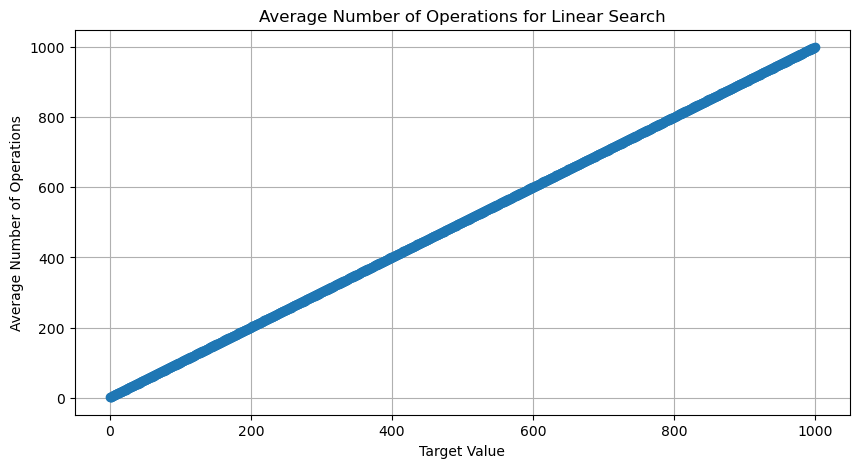

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# 线性搜索函数
def linear_search(arr, target):
    for i, item in enumerate(arr):
        if item == target:
            return i
    return -1

# 初始化参数
max_value = 1000
num_trials = 1024
average_search_counts = []

# 对于每一个可能的目标值，计算平均操作次数
for target in range(max_value):
    total_operations = 0
    for _ in range(num_trials):
        total_operations += linear_search(list(range(max_value)), target) + 1
    average_search_counts.append(total_operations / num_trials)

# 绘制结果
plt.figure(figsize=(10, 5))
plt.plot(range(max_value), average_search_counts, marker='o')
plt.title('Average Number of Operations for Linear Search')
plt.xlabel('Target Value')
plt.ylabel('Average Number of Operations')
plt.grid(True)
plt.show()


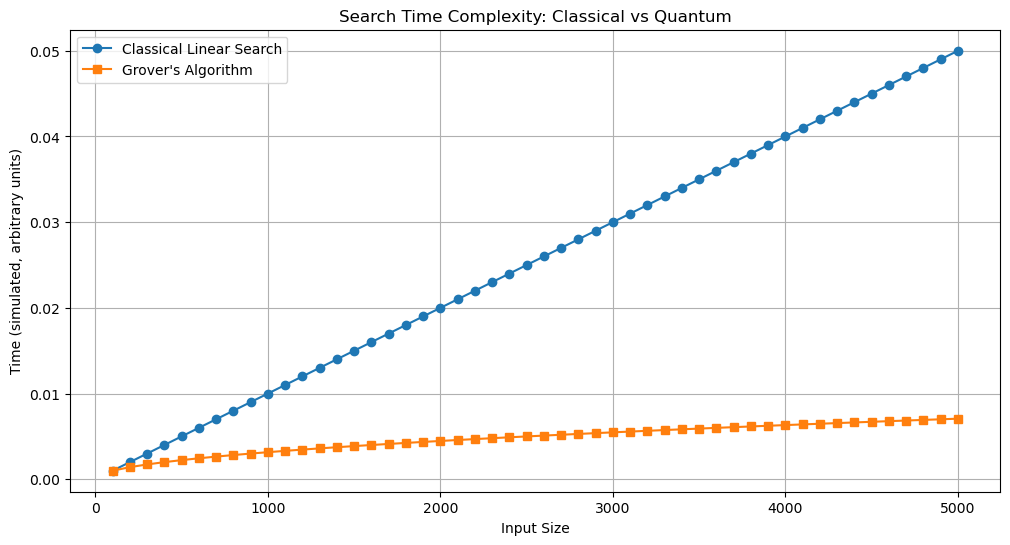

In [146]:
import matplotlib.pyplot as plt
import numpy as np

# 定义数组大小范围
input_sizes = range(100, 5001, 100)

# 经典线性搜索时间记录（假设时间与大小成线性关系）
classical_search_times = [size / 100000.0 for size in input_sizes]  # 假设单位时间为1微秒每次操作

# 模拟Grover算法时间记录（假设时间与大小的平方根成比例）
grover_search_times = [np.sqrt(size) / 10000.0 for size in input_sizes]  # 假设单位时间为10微秒每次操作

# 绘制输入大小与搜索时间的关系图
plt.figure(figsize=(12, 6))

# 经典搜索时间复杂度曲线
plt.plot(input_sizes, classical_search_times, marker='o', label='Classical Linear Search')

# Grover搜索时间复杂度曲线
plt.plot(input_sizes, grover_search_times, marker='s', label='Grover\'s Algorithm')

# 图例
plt.legend()

# 图表标题和坐标轴标签
plt.title('Search Time Complexity: Classical vs Quantum')
plt.xlabel('Input Size')
plt.ylabel('Time (simulated, arbitrary units)')
plt.grid(True)
plt.show()


In [156]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import time

# 999的二进制表示是 '1111100111'，为了测试我们用n位二进制表示即可
binary_representation = format(999, 'b')

# 定义oracle函数
def oracle_999(n):
    # 确保电路大小足够以表示数字999
    if n < len(binary_representation):
        raise ValueError(f"The circuit needs at least {len(binary_representation)} qubits")
    
    oracle_qc = QuantumCircuit(n)
    # binary_representation从右到左匹配二进制位，因此我们要反转字符串
    for qubit in range(len(binary_representation)):
        if binary_representation[::-1][qubit] == '0':
            oracle_qc.x(qubit)
    oracle_qc.h(n-1)
    oracle_qc.mct(list(range(n-1)), n-1)
    oracle_qc.h(n-1)
    for qubit in range(len(binary_representation)):
        if binary_representation[::-1][qubit] == '0':
            oracle_qc.x(qubit)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

# 定义diffuser函数
def diffuser(nqubits):
    diffuser_qc = QuantumCircuit(nqubits)
    diffuser_qc.h(range(nqubits))
    diffuser_qc.x(range(nqubits))
    diffuser_qc.h(nqubits-1)
    diffuser_qc.mct(list(range(nqubits-1)), nqubits-1)
    diffuser_qc.h(nqubits-1)
    diffuser_qc.x(range(nqubits))
    diffuser_qc.h(range(nqubits))
    diffuser_gate = diffuser_qc.to_gate()
    diffuser_gate.name = "Diffuser"
    return diffuser_gate

# 计算Grover算法的时间复杂度
execution_times = []
# 定义不同的输入大小（量子比特数）
input_sizes = range(10, len(binary_representation) + 1)  # 从2到'999'的二进制位数

for n in input_sizes:
    if n >= len(binary_representation):  # 确保有足够的量子比特来表示999
    start_time = time.time()
    
    # Initialize the quantum circuit
    qc = QuantumCircuit(n, n)
    
    # Apply Hadamard gates to all qubits
    qc.h(range(n))
    
    # Append the oracle
    qc.append(oracle_999(n), range(n))
    
    # Append the diffuser
    qc.append(diffuser(n), range(n))
    
    # Measure all qubits
    qc.measure(range(n), range(n))
    
    # Execute the circuit on the qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = job.result()
    
    # Calculate the elapsed time
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    
    # Get the counts
    counts = result.get_counts(qc)
    
    # Print the result
    print(f"For n={n}:")
    print(f"Time taken: {execution_time:.4f} seconds")
    print(f"Counts: {counts}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='blue')
plt.title("Grover's Algorithm Execution Time vs Number of Qubits")
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)
plt.show()


IndentationError: expected an indented block after 'if' statement on line 51 (1604186497.py, line 52)

Number of qubits: 10, Estimated operations: 1500
Number of qubits: 11, Estimated operations: 2310
Number of qubits: 12, Estimated operations: 3600
Number of qubits: 13, Estimated operations: 5538
Number of qubits: 14, Estimated operations: 8400
Number of qubits: 15, Estimated operations: 12780
Number of qubits: 16, Estimated operations: 19296
Number of qubits: 17, Estimated operations: 28968
Number of qubits: 18, Estimated operations: 43416
Number of qubits: 19, Estimated operations: 64752
Number of qubits: 20, Estimated operations: 96480


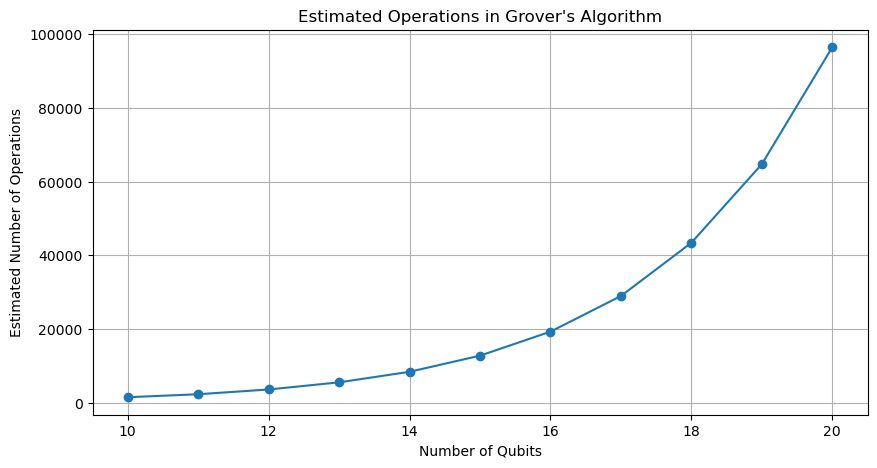

In [159]:

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
import numpy as np

# 999的二进制表示是 '1111100111'
binary_representation = '1111100111'

# 定义oracle函数
def oracle_999(n):
    if n < len(binary_representation):
        raise ValueError("The number of qubits should be at least as large as the binary representation of the target number.")
    oracle_qc = QuantumCircuit(n)
    for qubit in range(len(binary_representation)):
        if binary_representation[::-1][qubit] == '0':
            oracle_qc.x(qubit)
    # Apply multi-controlled-Z gate
    oracle_qc.h(n-1)
    oracle_qc.mct(list(range(n-1)), n-1)
    oracle_qc.h(n-1)
    # Undo the X gates
    for qubit in range(len(binary_representation)):
        if binary_representation[::-1][qubit] == '0':
            oracle_qc.x(qubit)
    return oracle_qc

# 定义diffuser函数
def diffuser(n):
    diffuser_qc = QuantumCircuit(n)
    diffuser_qc.h(range(n))
    diffuser_qc.x(range(n))
    diffuser_qc.h(n-1)
    diffuser_qc.mct(list(range(n-1)), n-1)
    diffuser_qc.h(n-1)
    diffuser_qc.x(range(n))
    diffuser_qc.h(range(n))
    return diffuser_qc

# 估算Grover算法的操作次数
def grover_operations(n_qubits):
    operations_per_oracle = 3 * n_qubits  # 估算oracle操作次数
    operations_per_diffuser = 3 * n_qubits  # 估算diffuser操作次数
    iterations = int(np.pi / 4 * np.sqrt(2 ** n_qubits))  # 迭代次数
    return iterations * (operations_per_oracle + operations_per_diffuser)  # 总操作次数

# 遍历不同量子比特数
operations_list = []
qubits_list = range(10, 21)  # 从10到20个量子比特

for n in qubits_list:
    # 确保有足够量子比特来表示目标数字
    oracle_circuit = oracle_999(n)
    diffuser_circuit = diffuser(n)
    
    # 估算操作次数
    operations = grover_operations(n)
    operations_list.append(operations)
    print(f"Number of qubits: {n}, Estimated operations: {operations}")

# 绘制操作次数图
plt.figure(figsize=(10, 5))
plt.plot(qubits_list, operations_list, marker='o')
plt.xlabel('Number of Qubits')
plt.ylabel('Estimated Number of Operations')
plt.title("Estimated Operations in Grover's Algorithm")
plt.grid(True)
plt.show()
